In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('dataset.csv')

In [13]:
dataset.columns = np.arange(0,1314,1)

In [14]:
dataset = dataset.rename(columns = {1313:'y'})

In [15]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,1304,1305,1306,1307,1308,1309,1310,1311,1312,y
0,-664.893982,42.973064,33.774681,19.010395,6.679077,19.021492,-0.460397,7.959387,-1.021394,-12.223078,...,2.826802,2.061264,3.101439,-1.083181,-4.011576,-9.076556,-9.498007,0.279875,1.844474,0.0
1,-684.811401,45.700417,30.563202,16.276447,6.857254,2.433283,1.980482,1.914696,-1.588914,-7.535582,...,-4.985556,-10.977321,-8.847828,-4.758451,-1.864999,-0.850048,-2.128043,-6.080996,-11.603594,0.0
2,-666.741272,44.304237,23.586473,9.188745,2.343037,-2.843102,-7.420186,-8.864174,-6.067932,-1.425777,...,16.179451,4.209424,1.074393,13.180349,-7.446131,10.155382,-9.640419,14.631237,-6.776390,0.0
3,-666.570740,43.700485,31.516514,18.954174,10.937471,7.698215,6.362135,4.451750,1.618819,-1.210591,...,7.229186,7.180048,3.185818,-5.246203,-11.755089,-12.530259,-8.580826,-1.715387,6.510134,0.0
4,-595.056274,85.460396,-5.938885,-4.534225,15.192793,45.978783,10.069826,-14.569935,-20.106915,-2.857301,...,8.547496,20.656046,7.484484,5.159965,-15.341157,-8.316089,15.003605,20.700169,-7.505561,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32196,-784.851929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.165330,-13.527212,-7.296999,0.741603,7.772993,7.515875,7.180158,4.396338,-1.839774,10.0
32197,-730.551331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.015119,-3.746939,-4.559802,-2.408008,-0.782411,-0.136823,-3.888503,-10.487751,-12.543070,10.0
32198,-752.315002,6.634571,6.329550,5.836230,5.176166,4.377631,3.473885,2.501186,1.496724,0.496608,...,-2.810447,-2.525017,-4.687611,-12.478443,-15.555815,-6.500263,-7.526064,-12.607552,-10.298364,10.0
32199,-753.753174,0.020376,0.002046,-0.017378,-0.027508,-0.022933,-0.006094,0.014004,0.026619,0.024993,...,9.474728,8.953980,7.510908,5.632401,3.996009,3.183716,2.844137,1.997395,0.415954,10.0


In [16]:
X = dataset.drop(['y'],axis=1)
Y = dataset.y

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)
ytrain = pd.get_dummies(ytrain)

In [18]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(25760, 1313)
(6441, 1313)
(25760, 11)
(6441,)


In [19]:
first = []
for i in range(1,102):
    first.append(list(xtrain.iloc[0,(i-1)*13:i*13]))

In [20]:
first = np.array(first).reshape(1,101,13)
first.shape

(1, 101, 13)

In [21]:
for j in range(1,len(xtrain)):
    train_data = []
    for i in range(1,102):
        train_data.append([list(xtrain.iloc[j,(i-1)*13:i*13])])
    train_data = np.array(train_data).reshape(1,101,13)
    first = np.concatenate((first,train_data),axis=0)

In [22]:
def tensorbuilder(x,timesteps,inputdepth):
    first = []
    for i in range(1,timesteps+1):
        first.append(list(x.iloc[0,(i-1)*inputdepth:i*inputdepth]))
    first = np.array(first).reshape(1,timesteps,inputdepth)
    
    for j in range(1,len(x)):
        train_data = []
        for i in range(1,timesteps+1):
            train_data.append([list(x.iloc[j,(i-1)*inputdepth:i*inputdepth])])
        train_data = np.array(train_data).reshape(1,timesteps,inputdepth)
        first = np.concatenate((first,train_data),axis=0)
    return(first)

In [23]:
stackedtrain = first
stackedtest = tensorbuilder(xtest,101,13)

In [24]:
print(ytrain.shape)
print(stackedtest.shape)
print(stackedtrain.shape)

(25760, 11)
(6441, 101, 13)
(25760, 101, 13)


In [5]:
import keras

In [6]:
from keras.preprocessing import sequence

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [33]:
def build_model(model_name):
    if model_name == 'rnn':
        model = Sequential()
        model.add(SimpleRNN(101, input_shape=(101,13), return_sequences = True))
        model.add(Dropout(0.4))
        model.add(SimpleRNN(101))
        model.add(Dropout(0.4))
        model.add(Dense(11, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)
        mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)  
        print(model.summary())
    else:
        model = Sequential()
        model.add(LSTM(101, input_shape=(101,13), return_sequences = True))
        model.add(Dropout(0.5))
        model.add(LSTM(101))
        model.add(Dropout(0.5))
        model.add(Dense(11, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)
        mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        
        print(model.summary())
    return model

In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [35]:
pd.get_dummies(ytest)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
2467,1,0,0,0,0,0,0,0,0,0,0
31937,0,0,0,0,0,0,0,0,0,0,1
17174,0,0,0,0,0,0,1,0,0,0,0
4397,0,1,0,0,0,0,0,0,0,0,0
2429,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27477,0,0,0,0,0,0,0,0,0,1,0
19574,0,0,0,0,0,0,1,0,0,0,0
138,1,0,0,0,0,0,0,0,0,0,0
27120,0,0,0,0,0,0,0,0,1,0,0


In [36]:
rnn_model = build_model('rnn')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 101, 101)          11615     
_________________________________________________________________
dropout_8 (Dropout)          (None, 101, 101)          0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 101)               20503     
_________________________________________________________________
dropout_9 (Dropout)          (None, 101)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)                1122      
Total params: 33,240
Trainable params: 33,240
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
lstm_model = build_model('lstm')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 101, 101)          46460     
_________________________________________________________________
dropout_10 (Dropout)         (None, 101, 101)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 101)               82012     
_________________________________________________________________
dropout_11 (Dropout)         (None, 101)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 11)                1122      
Total params: 129,594
Trainable params: 129,594
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
rnn_output = rnn_model.fit(stackedtrain, ytrain, epochs = 400, validation_split= 0.3, verbose=0, callbacks=[es,mc] )


Epoch 00001: val_accuracy did not improve from 0.62177

Epoch 00002: val_accuracy did not improve from 0.62177

Epoch 00003: val_accuracy did not improve from 0.62177

Epoch 00004: val_accuracy did not improve from 0.62177

Epoch 00005: val_accuracy did not improve from 0.62177

Epoch 00006: val_accuracy did not improve from 0.62177

Epoch 00007: val_accuracy did not improve from 0.62177

Epoch 00008: val_accuracy did not improve from 0.62177

Epoch 00009: val_accuracy did not improve from 0.62177

Epoch 00010: val_accuracy did not improve from 0.62177

Epoch 00011: val_accuracy did not improve from 0.62177

Epoch 00012: val_accuracy did not improve from 0.62177

Epoch 00013: val_accuracy did not improve from 0.62177

Epoch 00014: val_accuracy did not improve from 0.62177

Epoch 00015: val_accuracy did not improve from 0.62177

Epoch 00016: val_accuracy did not improve from 0.62177

Epoch 00017: val_accuracy did not improve from 0.62177

Epoch 00018: val_accuracy did not improve from 


Epoch 00148: val_accuracy did not improve from 0.62177

Epoch 00149: val_accuracy did not improve from 0.62177

Epoch 00150: val_accuracy did not improve from 0.62177

Epoch 00151: val_accuracy did not improve from 0.62177

Epoch 00152: val_accuracy did not improve from 0.62177

Epoch 00153: val_accuracy did not improve from 0.62177

Epoch 00154: val_accuracy did not improve from 0.62177

Epoch 00155: val_accuracy did not improve from 0.62177

Epoch 00156: val_accuracy did not improve from 0.62177

Epoch 00157: val_accuracy did not improve from 0.62177

Epoch 00158: val_accuracy did not improve from 0.62177

Epoch 00159: val_accuracy did not improve from 0.62177

Epoch 00160: val_accuracy did not improve from 0.62177

Epoch 00161: val_accuracy did not improve from 0.62177

Epoch 00162: val_accuracy did not improve from 0.62177

Epoch 00163: val_accuracy did not improve from 0.62177

Epoch 00164: val_accuracy did not improve from 0.62177

Epoch 00165: val_accuracy did not improve from 


Epoch 00295: val_accuracy did not improve from 0.62177

Epoch 00296: val_accuracy did not improve from 0.62177

Epoch 00297: val_accuracy did not improve from 0.62177

Epoch 00298: val_accuracy did not improve from 0.62177

Epoch 00299: val_accuracy did not improve from 0.62177

Epoch 00300: val_accuracy did not improve from 0.62177

Epoch 00301: val_accuracy did not improve from 0.62177

Epoch 00302: val_accuracy did not improve from 0.62177

Epoch 00303: val_accuracy did not improve from 0.62177

Epoch 00304: val_accuracy did not improve from 0.62177

Epoch 00305: val_accuracy did not improve from 0.62177

Epoch 00306: val_accuracy did not improve from 0.62177

Epoch 00307: val_accuracy did not improve from 0.62177

Epoch 00308: val_accuracy did not improve from 0.62177

Epoch 00309: val_accuracy did not improve from 0.62177

Epoch 00310: val_accuracy did not improve from 0.62177

Epoch 00311: val_accuracy did not improve from 0.62177

Epoch 00312: val_accuracy did not improve from 

In [38]:
lstm_output = lstm_model.fit(stackedtrain, ytrain, epochs = 400, validation_split = 0.3, verbose=0, callbacks=[es,mc])


Epoch 00001: val_accuracy improved from -inf to 0.62177, saving model to best_model.h5


KeyboardInterrupt: 

# LSTM Accuracy

In [40]:
saved_model = load_model('best_model.h5')

In [41]:
results = saved_model.predict(stackedtest)

In [42]:
predicted = results.round().astype(int)

In [43]:
predicted = pd.DataFrame(predicted).idxmax(axis=1)

In [44]:
a = predicted == np.asarray(ytest)

In [45]:
k = 0
for i in range(len(a)):
    if a[i] == True:
        k = k+1

In [46]:
k

6092

In [47]:
len(a)

6441

In [48]:
k/len(a)

0.9458158671013818

# RNN Accuracy

In [41]:
results = rnn_model.predict(stackedtest)

In [42]:
predicted = results.round().astype(int)

In [43]:
predicted = pd.DataFrame(predicted).idxmax(axis=1)

In [44]:
a = predicted==np.asarray(ytest)

In [45]:
k = 0
for i in range(len(a)):
    if a[i] == True:
        k = k+1

In [46]:
k

685

In [47]:
len(a)

6441

In [48]:
k/len(a)

0.1063499456606117

# Metrics for judging RNN and LSTM

## Loss for both LSTM and RNN

In [49]:
loss_lstm = lstm_output.history['loss']
accuracy_lstm = lstm_output.history['accuracy']
val_loss_lstm = lstm_output.history['val_loss']
val_accuracy_lstm = lstm_output.history['val_accuracy']

In [49]:
loss_rnn = rnn_output.history['loss']
accuracy_rnn = rnn_output.history['accuracy']
val_loss_rnn = rnn_output.history['val_loss']
val_accuracy_rnn = rnn_output.history['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt

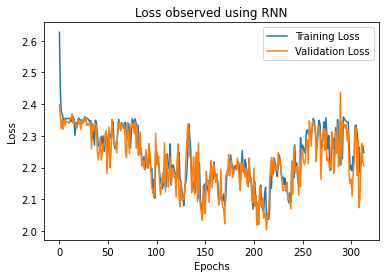

In [50]:
plt.plot(loss_rnn)
plt.plot(val_loss_rnn)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss observed using RNN')
plt.show()

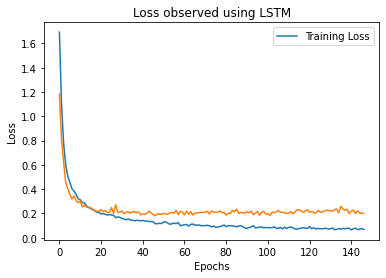

In [54]:
plt.plot(loss_lstm)
plt.plot(val_loss_lstm)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'validation'])
plt.title('Loss observed using LSTM')
plt.show()

## Accuracy for RNN

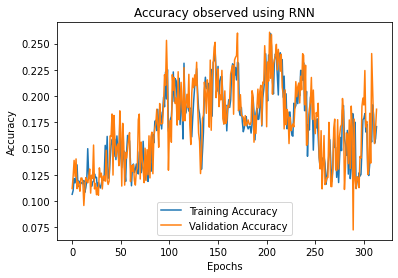

In [51]:
plt.plot(accuracy_rnn)
plt.plot(val_accuracy_rnn)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Accuracy observed using RNN')
plt.show()

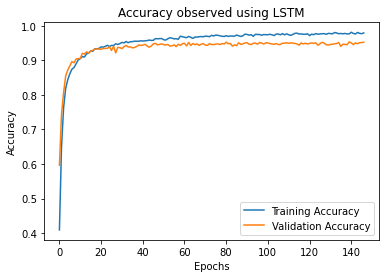

In [51]:
plt.plot(accuracy_lstm)
plt.plot(val_accuracy_lstm)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Accuracy observed using LSTM')
plt.show()

## Comparing training accuracy of both LSTM and RNN

In [ ]:
plt.plot(accuracy_rnn)
plt.plot(accuracy_lstm)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['RNN Accuracy', 'LSTM Accuracy'])
plt.title('Training Accuracy contrasting LSTM and RNN')
plt.show()